In [21]:
import os
import cv2
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt



# Veri setini yüklemek için fonksiyon

In [22]:
def get_data(data_dir, labels=['PNEUMONIA', 'NORMAL'], img_size=150):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        image_files = glob(os.path.join(path, '*.jpeg'))
        
        for img_file in image_files:
            try:
                img_arr = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    
    # Tüm görüntüleri aynı boyuta getir
    data = [(np.array(img), class_num) for img, class_num in data if img.shape == (img_size, img_size)]
    
    # Verileri karıştır
    np.random.shuffle(data)
    
    # Numpy array'e dönüştür
    data = np.array(data, dtype=object)
    
    return data




# Verileri yükle


In [23]:
train_data = get_data('chest_xray/train', labels=['PNEUMONIA', 'NORMAL'])
test_data = get_data('chest_xray/test', labels=['PNEUMONIA', 'NORMAL'])
val_data = get_data('chest_xray/val', labels=['PNEUMONIA', 'NORMAL'])



# Veri setini x ve y olarak ayıralım


In [24]:
x_train = np.array([i[0] for i in train_data]).reshape(-1, 150, 150, 1)
y_train = np.array([i[1] for i in train_data])

x_test = np.array([i[0] for i in test_data]).reshape(-1, 150, 150, 1)
y_test = np.array([i[1] for i in test_data])

x_val = np.array([i[0] for i in val_data]).reshape(-1, 150, 150, 1)
y_val = np.array([i[1] for i in val_data])

# Model Oluşturma

In [25]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Eğitim

In [26]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
9/9 [==============================] - 10s 870ms/step - loss: 49.3076 - accuracy: 0.5620 - val_loss: 0.9924 - val_accuracy: 0.5000
Epoch 2/10
9/9 [==============================] - 6s 681ms/step - loss: 0.5892 - accuracy: 0.7752 - val_loss: 0.7789 - val_accuracy: 0.7500
Epoch 3/10
9/9 [==============================] - 7s 760ms/step - loss: 0.5831 - accuracy: 0.8566 - val_loss: 0.5055 - val_accuracy: 0.7500
Epoch 4/10
9/9 [==============================] - 8s 875ms/step - loss: 0.2383 - accuracy: 0.9302 - val_loss: 0.3640 - val_accuracy: 0.7500
Epoch 5/10
9/9 [==============================] - 8s 919ms/step - loss: 0.3244 - accuracy: 0.8798 - val_loss: 0.3966 - val_accuracy: 0.7500
Epoch 6/10
9/9 [==============================] - 8s 913ms/step - loss: 0.1543 - accuracy: 0.9457 - val_loss: 0.3290 - val_accuracy: 0.7500
Epoch 7/10
9/9 [==============================] - 8s 930ms/step - loss: 0.1428 - accuracy: 0.9806 - val_loss: 1.5791 - val_accuracy: 0.7500
Epoch 8/10
9/9 [==

# Model performansını 

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

predictions_train_probs = model.predict(x_train)
predictions_test_probs = model.predict(x_test)

predictions_train = np.argmax(predictions_train_probs, axis=1)
predictions_test = np.argmax(predictions_test_probs, axis=1)

print("Training Classification Report:")
print(classification_report(y_train, predictions_train))

print("Testing Classification Report:")
print(classification_report(y_test, predictions_test))


1/1 [==============================] - 0s 55ms/step - loss: 0.6410 - accuracy: 0.7500
Test Loss: 0.6409511566162109, Test Accuracy: 0.75
1/1 [==============================] - 0s 42ms/step
Training Classification Report:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63       118
           1       0.00      0.00      0.00       140

    accuracy                           0.46       258
   macro avg       0.23      0.50      0.31       258
weighted avg       0.21      0.46      0.29       258

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



/home/osman/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/osman/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/osman/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/osman/.local/lib/py

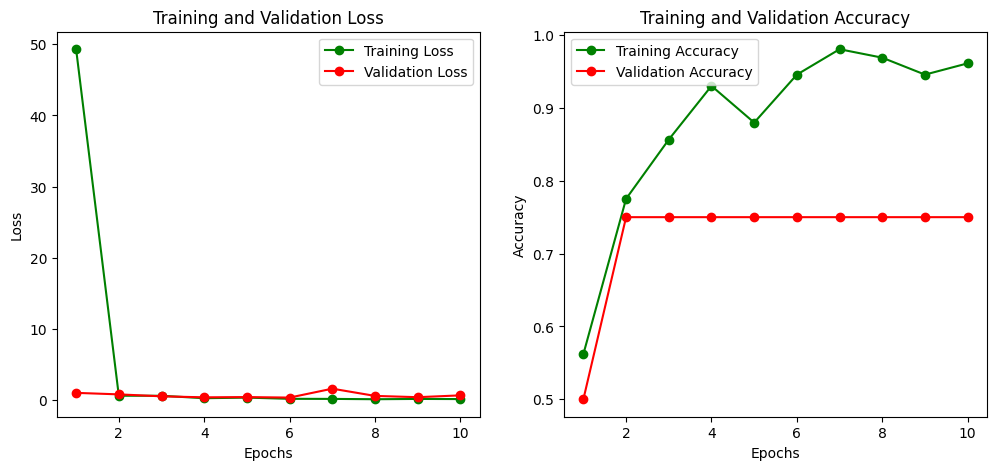

In [28]:

def plot_history(history):
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    
    val_loss = history.history.get('val_loss')
    val_accuracy = history.history.get('val_accuracy')
    
    epochs = range(1, len(loss) + 1)
    
    # Loss grafiği
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'g-o', label='Training Loss')
    if val_loss is not None:
        plt.plot(epochs, val_loss, 'r-o', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy grafiği
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'g-o', label='Training Accuracy')
    if val_accuracy is not None:
        plt.plot(epochs, val_accuracy, 'r-o', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()


plot_history(history)


## model test

1/1 [==============================] - 0s 171ms/step


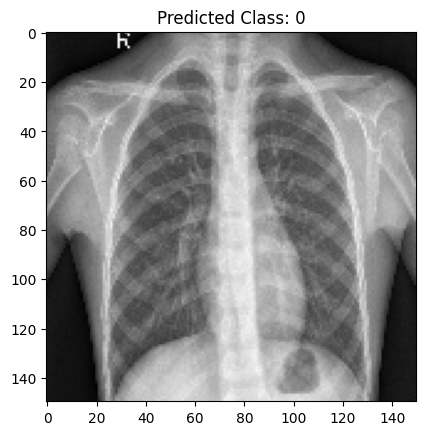

In [29]:
image_path = 'chest_xray/test/NORMAL/IM-0001-0001.jpeg'  

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
resized_img = cv2.resize(img, (150, 150))
resized_img = resized_img / 255

prediction_prob = model.predict(np.expand_dims(resized_img, axis=0))[0]
predicted_class = np.argmax(prediction_prob)

plt.imshow(resized_img, cmap='gray')
plt.title(f'Predicted Class: {predicted_class}')
plt.show()


In [ ]:
model.save("model.h5")